https://www.tensorflow.org/lite/tutorials/model_maker_image_classification

In [1]:
!pip install -q tflite-model-maker

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt


2021-08-21 14:53:39.750942: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
image_path = '../data/generated_data/coins/'

In [4]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

2021-08-21 14:53:42.118103: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-21 14:53:42.133275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-21 14:53:42.133526: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-08-21 14:53:42.133546: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-21 14:53:42.136017: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-21 14:53:42.136070: I tensorflow/stream_executor/platform/de

INFO:tensorflow:Load image with size: 5713, num_label: 8, labels: 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2.


In [5]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 10248     
Total params: 2,268,232
Trainable params: 10,248
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/10


/home/ricardo.hortelano/.local/share/virtualenvs/lab-BmWZapa2/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-08-21 14:53:46.079798: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-21 14:53:46.098034: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2799925000 Hz
2021-08-21 14:53:48.424009: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-08-21 14:53:48.677921: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2021-08-21 14:53:48.970871: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-21 14:53:49.166371: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Succe

142/142 [==============================] - 19s 109ms/step - loss: 1.1074 - accuracy: 0.7262 - val_loss: 0.7843 - val_accuracy: 0.8750
Epoch 2/10
142/142 [==============================] - 15s 106ms/step - loss: 0.8175 - accuracy: 0.8750 - val_loss: 0.7281 - val_accuracy: 0.9173
Epoch 3/10
142/142 [==============================] - 15s 106ms/step - loss: 0.7841 - accuracy: 0.8922 - val_loss: 0.7532 - val_accuracy: 0.9062
Epoch 4/10
142/142 [==============================] - 15s 106ms/step - loss: 0.7544 - accuracy: 0.9133 - val_loss: 0.7024 - val_accuracy: 0.9467
Epoch 5/10
142/142 [==============================] - 15s 107ms/step - loss: 0.7460 - accuracy: 0.9098 - val_loss: 0.7193 - val_accuracy: 0.9283
Epoch 6/10
142/142 [==============================] - 18s 128ms/step - loss: 0.7198 - accuracy: 0.9291 - val_loss: 0.6935 - val_accuracy: 0.9412
Epoch 7/10
142/142 [==============================] - 18s 127ms/step - loss: 0.7049 - accuracy: 0.9349 - val_loss: 0.7009 - val_accuracy: 0.9

In [6]:
loss, accuracy = model.evaluate(test_data)

18/18 [==============================] - 3s 142ms/step - loss: 0.6631 - accuracy: 0.9580


In [7]:
model.export(export_dir='.')

2021-08-21 14:56:40.269363: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpa351inu1/assets


INFO:tensorflow:Assets written to: /tmp/tmpa351inu1/assets
2021-08-21 14:56:42.868676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-21 14:56:42.868872: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-08-21 14:56:42.868931: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-08-21 14:56:42.869177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-21 14:56:42.869332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB devic

INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp58d9uc2d/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp58d9uc2d/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


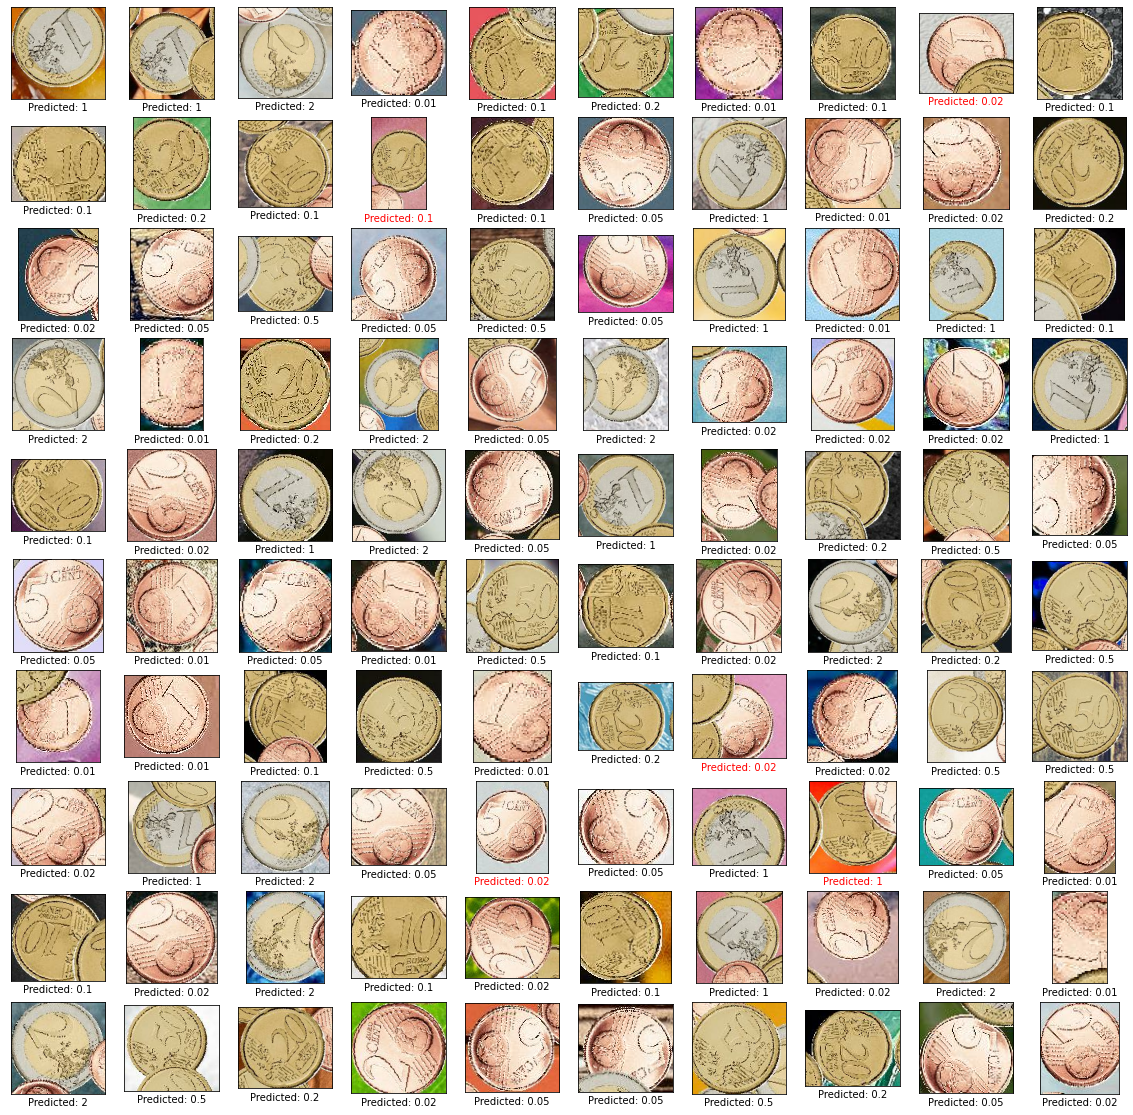

In [8]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
    if val1 == val2:
        return 'black'
    else:
        return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.numpy(), cmap=plt.cm.gray)

    predict_label = predicts[i][0][0]
    color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
    ax.xaxis.label.set_color(color)
    plt.xlabel('Predicted: %s' % predict_label)
plt.show()
